# Combining gone fishing (BAIT) with Fisher mask (FISH)

Fisher mask code in FISH folder

In [1]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
import torchvision

print(torch.__version__, torchvision.__version__)

1.13.0 0.14.0


Next steps:

* download the dataset cifar10, and create a dataloader  with appropriate preprocessing
* iterate over minibatches from dataloader, calculate crossentropy loss, 
* in typical sgd training, we zero out the gradients before processing the next minibatch. this is done by calling model.zero_grad(), and then calling model.backward() to get the new gradients. Since we are not interested in training right now, we want the sum of gradients over all minibatches. so we should not call model.zero_grad()
* identify the top 2% of all the weights in the model and make a new pk x k array, where p = 2% of the total number of parameters.

In [3]:
from torchvision.models import resnet18, ResNet18_Weights

# Using pretrained weights:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
preprocess = ResNet18_Weights.DEFAULT.transforms()
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [4]:
type(preprocess)

torchvision.transforms._presets.ImageClassification

In [5]:
import torchvision.datasets as datasets

processed_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=preprocess)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6 <class 'torch.Tensor'>


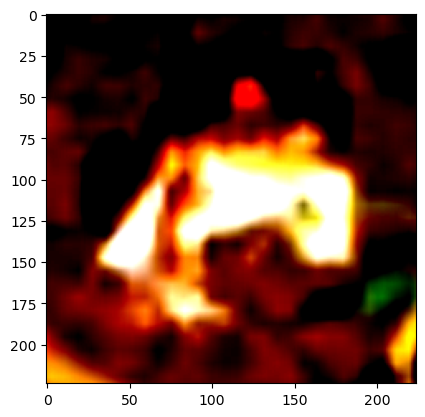

In [20]:
import matplotlib.pyplot as plt
import numpy as np

img, label = processed_trainset[0]
print(label, type(img))
im = img.permute(1, 2, 0) # https://stackoverflow.com/a/55196345
plt.imshow(im)
plt.show()

In [23]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
trainloader = torch.utils.data.DataLoader(processed_trainset, batch_size=128, num_workers=1)

# Scratch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6 <class 'PIL.Image.Image'>


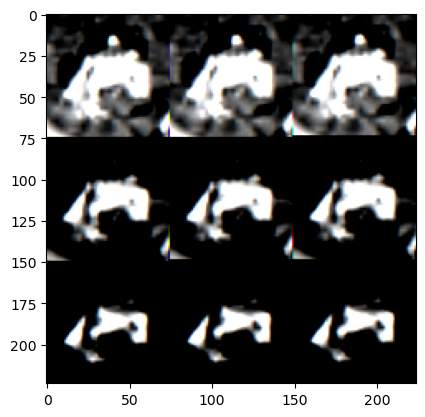

In [9]:
img, label = vanilla_trainset[0]
print(label, type(img))
im = np.array(preprocess(img)).reshape((224, 224, 3))
plt.imshow(im)
plt.show()

6 <class 'PIL.Image.Image'>


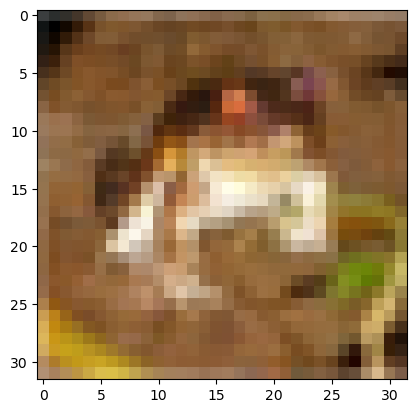

In [10]:
img, label = vanilla_trainset[0]
print(label, type(img))
im = np.array(img).reshape((32, 32, 3))
plt.imshow(im)
plt.show()

In [11]:
img = preprocess(vanilla_trainset[0][0])
print(type(img), img.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


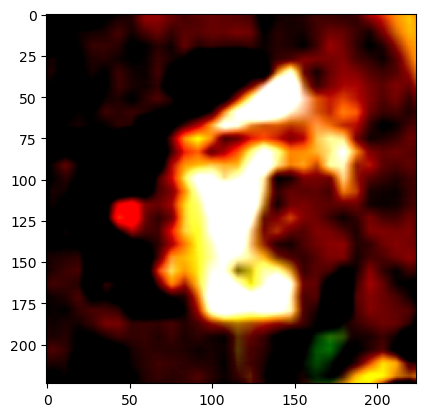

In [18]:
plt.imshow(torch.transpose(img, 0, 2))

In [24]:
import torchvision.transforms as transforms

cifar_args = {'n_epoch': 3, 'transform': transforms.Compose([ 
                     transforms.RandomCrop(32, padding=4),
                     transforms.RandomHorizontalFlip(),
                     transforms.ToTensor(),
                     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                 ]),
                 'loader_tr_args':{'batch_size': 128, 'num_workers': 1},
                 'loader_te_args':{'batch_size': 1000, 'num_workers': 1},
                 'optimizer_args':{'lr': 0.05, 'momentum': 0.3},
                 'transformTest': transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])
            }
cifar_trainset2 = datasets.CIFAR10(root='./data', train=True, download=True, transform=cifar_args['transform'])
cifar_trainloader2 = torch.utils.data.DataLoader(cifar_trainset, batch_size=cifar_args['loader_tr_args']['batch_size'], num_workers=cifar_args['loader_tr_args']['num_workers'], shuffle=True)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


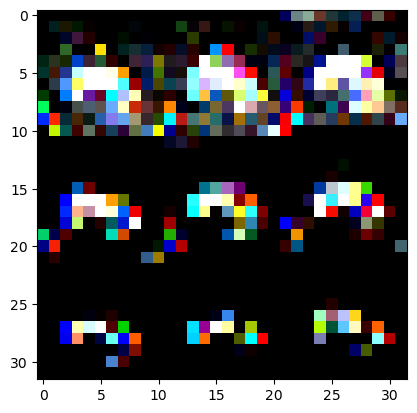

In [46]:
img, label = cifar_trainset2[0]
print(label)
plt.imshow(img.squeeze().reshape((32, 32, -1)))
plt.show()

In [45]:
img = np.array(img)
img.shape

(3, 32, 32)

In [13]:
cifar3 = datasets.CIFAR10(root='./data', train=True, download=True)

Files already downloaded and verified


In [14]:
import numpy as np
im = np.array(cifar3[0][0])
im.shape

(32, 32, 3)

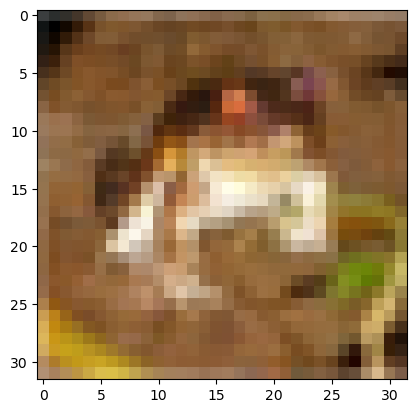

In [15]:
plt.imshow(im)


In [39]:
img, label = cifar_trainset[0]
im = np.array(img)
im.shape

(3, 224, 224)

In [16]:
img = preprocess(cifar3[0][0])
print(type(img), img.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


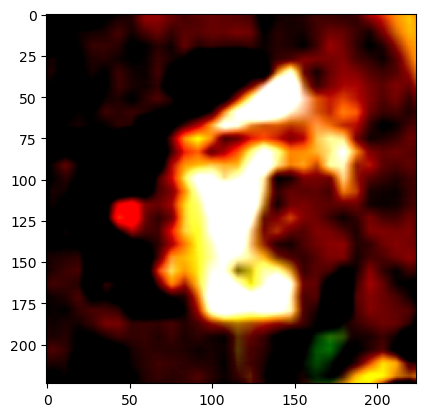

In [17]:
plt.imshow(torch.transpose(img, 0, 2))